<a href="https://colab.research.google.com/github/ellabam/learning-java/blob/master/DATA_691_Spring_2022_Convolution_Live.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2  # python-opencv
import numpy as np
from matplotlib import pyplot as plt
from scipy.signal import convolve2d
from PIL import Image
import requests
from io import BytesIO

In [ ]:
def random_lines(image, k, thickness=1):
  m, n = image.shape
  for _ in range(k//2):
    x0 = np.random.randint(0, m)
    x1 = np.random.randint(0, m)
    cv2.line(image, (x0, 0), (x1, n), (255, 255, 255), thickness=thickness)
  for _ in range(k - k//2):
    y0 = np.random.randint(0, n)
    y1 = np.random.randint(0, n)
    cv2.line(image, (0, y0), (m, y1), (255, 255, 255), thickness=thickness)
  
def random_squares(image, k, dx):
  Z = np.zeros_like(image)
  m, n = image.shape
  for _ in range(k):
    x0 = np.random.randint(0, m - dx)
    y0 = np.random.randint(0, n - dx)
    x1 = x0 + dx
    y1 = y0 + dx
    pts = np.array([[[x0, y0], [x0 + dx, y0], [x0 + dx, y0 + dx], [x0, y0 + dx]]], np.int32)
    cv2.fillPoly(image, pts, 255)
    cv2.fillPoly(Z, pts, 255)
  return Z

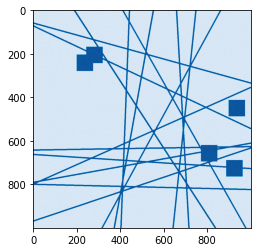

In [ ]:
np.random.seed(46)
width, height = 1000, 1000
image = np.zeros((height, width))
random_lines(image, 15, thickness=5)
Z = random_squares(image, 5, 75)
image = image/255. + 0.05*np.random.normal(size=image.shape)
plt.imshow(image, cmap="Blues")

In [ ]:
k = np.ones((50, 50))/50**2

a = convolve2d(image, k, mode="same")

Text(0.5, 1.0, 'truth')

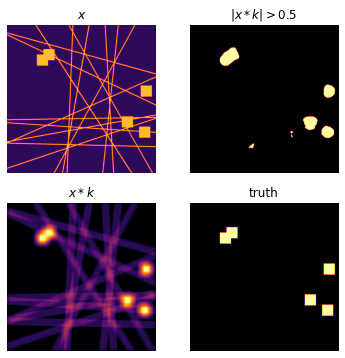

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(6,6))
ax = axes[0,0]
ax.imshow(image, cmap="inferno")
ax.set_axis_off()
ax.set_title("$x$")

ax = axes[1,0]
ax.imshow(a, cmap="inferno")
ax.set_axis_off()
ax.set_title("$x*k$")

ax = axes[0,1]
ax.imshow(a > 0.5, cmap="inferno")
ax.set_axis_off()
ax.set_title("$|x*k| > 0.5$")

ax = axes[1,1]
ax.imshow(Z, cmap="inferno")
ax.set_axis_off()
ax.set_title("truth")

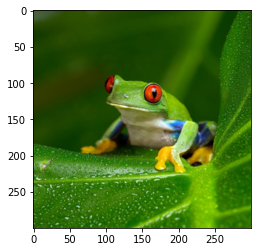

In [ ]:
response = requests.get("https://i.imgur.com/xGfU51r.jpg")
image = Image.open(BytesIO(response.content)).resize((300, 300))
x = np.array(image)/255.
plt.imshow(x)

In [ ]:
kx = np.array([[1, -1]])
ky = kx.T

xr = x[:, :, 0]
xg = x[:, :, 1]
xb = x[:, :, 2]

print(xr.shape, xg.shape, xb.shape)

y0 = convolve2d(xr, kx, mode="same")
y1 = convolve2d(xg, kx, mode="same")
y2 = convolve2d(xb, kx, mode="same")
y = np.stack([y0, y1, y2], axis=-1)
Y = np.abs(y).sum(axis=-1)

z0 = convolve2d(xr, ky, mode="same")
z1 = convolve2d(xg, ky, mode="same")
z2 = convolve2d(xb, ky, mode="same")
z = np.stack([z0, z1, z2], axis=-1)
Z = np.abs(z).sum(axis=-1)

(300, 300) (300, 300) (300, 300)


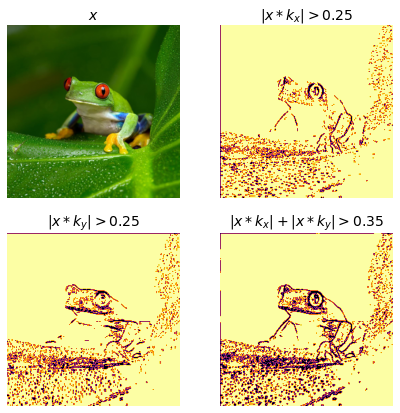

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(7, 7))
ax = axes[0,0]
ax.set_axis_off()
ax.set_title("$x$", fontsize=14)
ax.imshow(x)
ax = axes[0,1]
ax.set_axis_off()
ax.set_title("$|x*k_x|>0.25$", fontsize=14)
ax.imshow(Y > 0.25, cmap="inferno_r")
ax = axes[1,0]
ax.set_axis_off()
ax.set_title("$|x*k_y|>0.25$", fontsize=14)
ax.imshow(Z > 0.25, cmap="inferno_r")
ax = axes[1,1]
ax.set_axis_off()
ax.set_title("$|x*k_x| + |x*k_y| > 0.35$", fontsize=14)
ax.imshow((np.abs(Y) + np.abs(Z)) > 0.35, cmap="inferno_r")